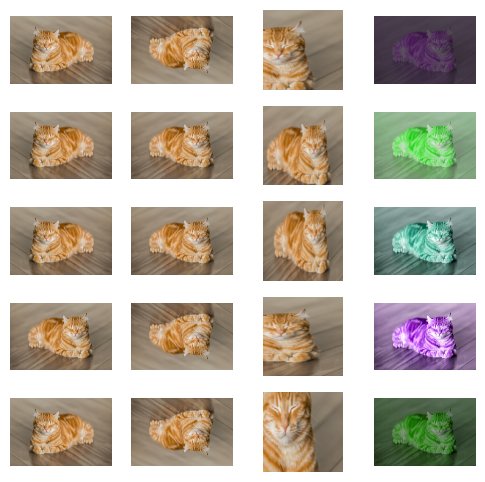

In [4]:
import torchvision
from torchvision import transforms
# 加载和预处理数据
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
# 读取图像文件
image0 = Image.open("/kaggle/input/cat-transform/cat.jpg")
num = 5 # 翻转次数
# 将图像翻转，翻转概率为50%
my_transform1 = transforms.RandomHorizontalFlip(p=0.5)
my_transform2 = transforms.RandomVerticalFlip(p=0.5)
my_transform3 = transforms.RandomResizedCrop(
    size=200, # 裁剪后的图像大小
    scale=(0.1, 1.0), # 随机裁剪面积比例范围
    ratio=(0.5, 2), # 随机长宽比例范围
    interpolation=2) # 插值方法，2表示双线性插值
my_transform4 = transforms.ColorJitter(
    brightness=0.5, # 亮度变化范围
    contrast=0.5, # 对比度变化范围
    saturation=0.5, # 饱和度变化范围
    hue=0.5) # 色相变化范围

# 初始化一个列表，用来存放翻转后的图像
image = []
# 图像翻转num次
for i in range(num):
    image.append(my_transform1(image0))
    image.append(my_transform2(image0))
    image.append(my_transform3(image0))
    image.append(my_transform4(image0))
# 创建一个图形窗口
plt.figure(figsize=(6,6)) # specifying the overall grid size

for i in range(20):
    plt.subplot(5,4,i+1)    # the number of images in the grid is 4*5 (20)
    plt.imshow(image[i])
    plt.axis('off')

plt.show()

In [8]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 16.6 MB/s eta 0:00:00a 0:00:01


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

0: 448x640 2 cats, 1 dog, 52.1ms
Speed: 26.5ms preprocess, 52.1ms inference, 455.2ms postprocess per image at shape (1, 3, 448, 640)


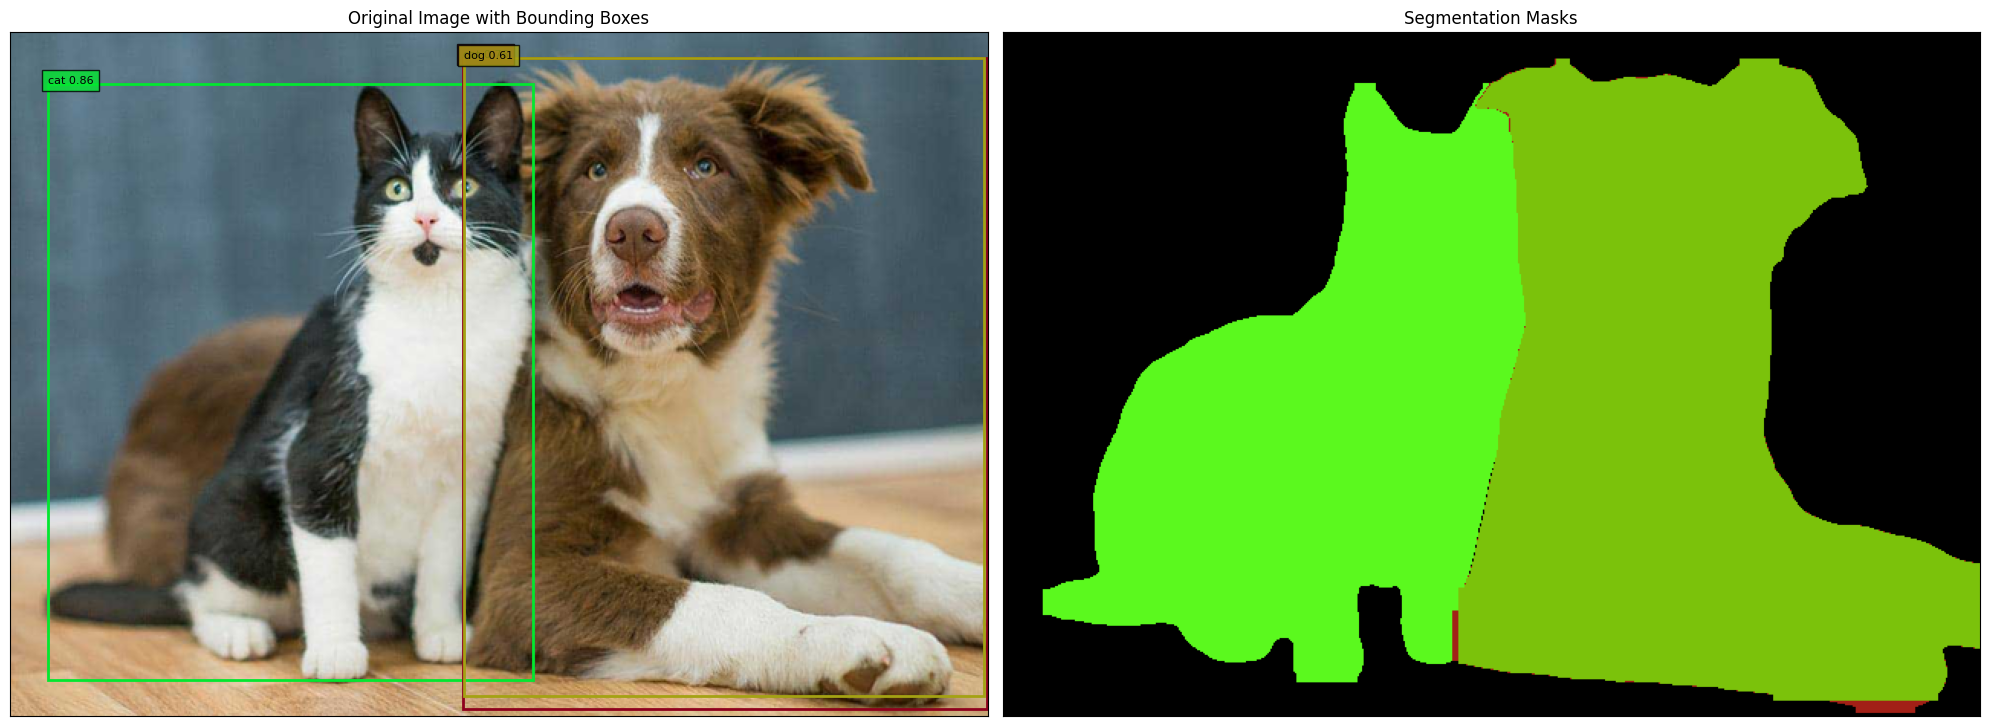

In [9]:
from PIL import Image
import numpy as np

# 打开原因图片
original_image = Image.open("/kaggle/input/cat-dog/cat_dog.jpg")
# 将图片resize到640x448，使用LANCZOS滤波器
new_image = original_image.resize((640, 448), Image.LANCZOS)
# 转换为numpy数组
new_image_np = np.array(new_image)

# 用yolo11模型进行目标检测
from ultralytics import YOLO

# 加载官方预训练模型，下载后放置在当前目录下
model = YOLO("/kaggle/input/yolo11n/other/default/1/yolo11n-seg.pt") 

# 用模型对自己的图片进行目标检测
results = model(new_image)

# ---------------------------------------------------
# 显示检测结果：目标检测框 + 分割mask图
from matplotlib import pyplot as plt

# 生成左右两个子图：边框 + mask
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# <1> 显示原图 + 检测框 ================
ax1.imshow(new_image_np)
ax1.set_title("Original Image with Bounding Boxes")
# 去掉坐标轴
ax1.set_xticks([])
ax1.set_yticks([])

# 遍历每个检测结果
for r in results:
    # 边框转换为numpy数组
    boxes = r.boxes.data.cpu().numpy()
    
    # 添加边框
    for box in boxes:
        # 边框颜色为随机颜色
        color = np.random.rand(3)
        
        # 在原图上添加边框
        x1, y1, x2, y2 = box[:4]
        rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor=color, linewidth=2)
        ax1.add_patch(rect)
        
        # 在原图上添加标签
        cls = int(box[5])
        label = f"{model.names[cls]} {box[4]:.2f}"
        ax1.text(x1, y1, label, fontsize=8, bbox=dict(facecolor=color, alpha=0.8))
        
# <2> 创建一个和原图大小相同的全黑图像 ================
mask_image = np.zeros_like(new_image_np)
ax2.imshow(mask_image) # 显示全黑图像
ax2.set_title("Segmentation Masks")
# 去掉坐标轴
ax2.set_xticks([])
ax2.set_yticks([])

# 遍历每个检测结果
for r in results:
    masks = r.masks.data.cpu().numpy()
    
    # 遍历每个检测结果的每个目标，画出边框和mask
    for mask in masks:
        # 边框颜色为随机颜色
        color = np.random.rand(3)
        
        # mask的高和宽
        h, w = mask.shape
        colored_mask = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
        
        # 生成mask图像，mask为0的地方保持原图像，mask为1的地方用colored_mask
        mask_image = np.where(mask[..., None], colored_mask, mask_image)

# 显示分割mask图
ax2.imshow(mask_image)

# 显示全部图像
plt.tight_layout()  # 调整子图之间的间距
plt.show() 


0: 448x640 2 cats, 1 dog, 51.2ms
Speed: 1.2ms preprocess, 51.2ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


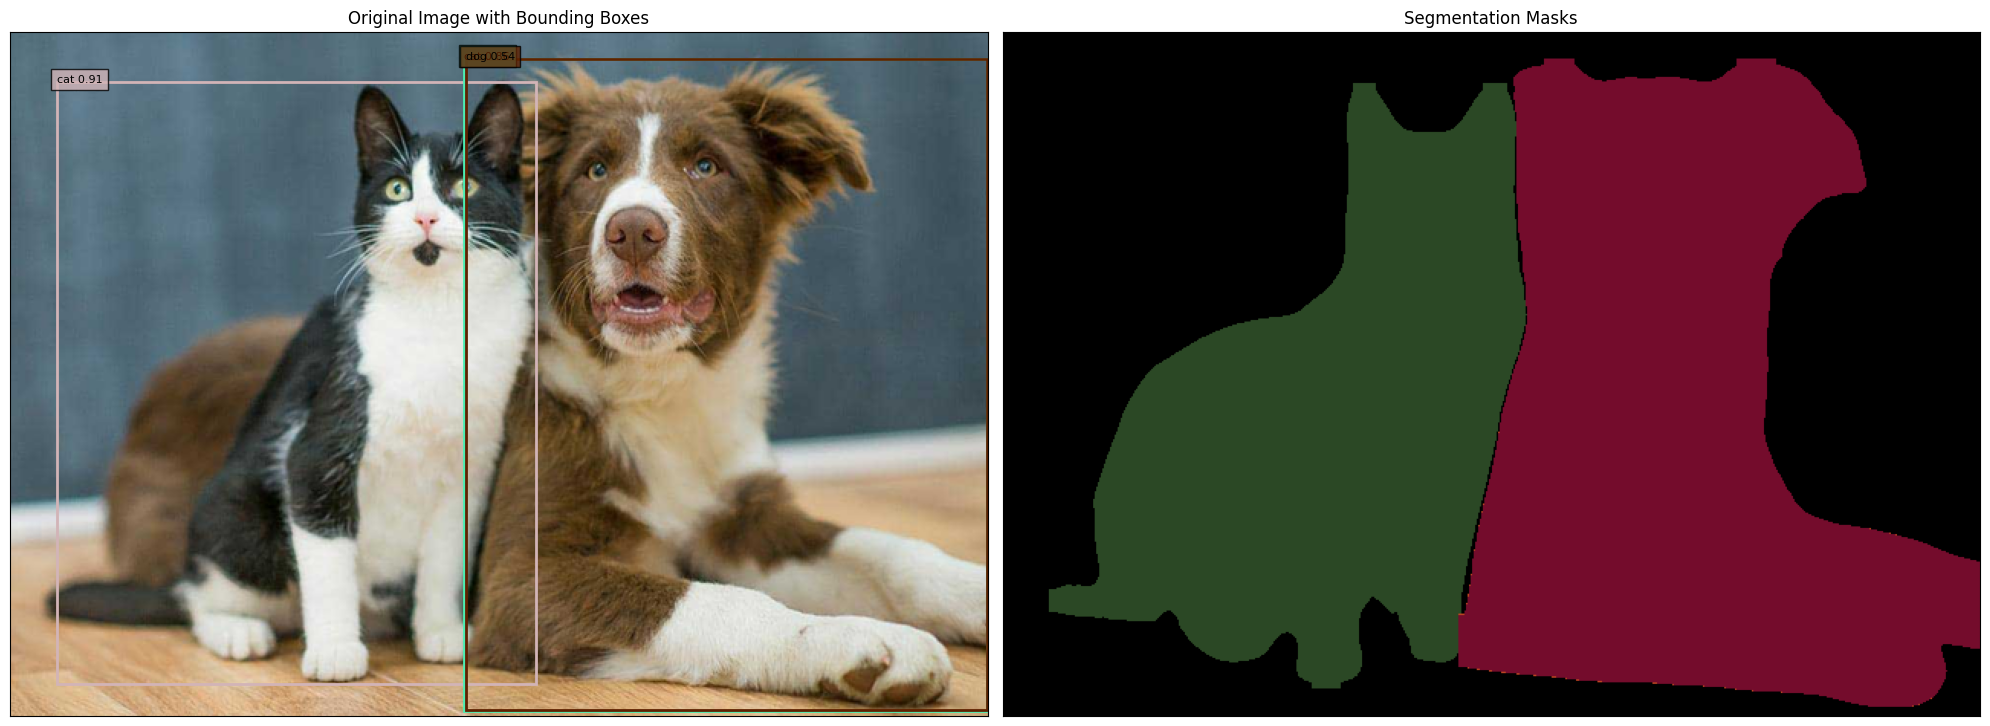

In [10]:
from PIL import Image
import numpy as np

# 打开原因图片
original_image = Image.open("/kaggle/input/cat-dog/cat_dog.jpg")
# 将图片resize到640x448，使用LANCZOS滤波器
new_image = original_image.resize((640, 448), Image.LANCZOS)
# 转换为numpy数组
new_image_np = np.array(new_image)

# 用yolo11模型进行目标检测
from ultralytics import YOLO

# 加载官方预训练模型，下载后放置在当前目录下
model = YOLO("/kaggle/input/yolo11l/other/default/1/yolo11l-seg.pt") 

# 用模型对自己的图片进行目标检测
results = model(new_image)

# ---------------------------------------------------
# 显示检测结果：目标检测框 + 分割mask图
from matplotlib import pyplot as plt

# 生成左右两个子图：边框 + mask
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# <1> 显示原图 + 检测框 ================
ax1.imshow(new_image_np)
ax1.set_title("Original Image with Bounding Boxes")
# 去掉坐标轴
ax1.set_xticks([])
ax1.set_yticks([])

# 遍历每个检测结果
for r in results:
    # 边框转换为numpy数组
    boxes = r.boxes.data.cpu().numpy()
    
    # 添加边框
    for box in boxes:
        # 边框颜色为随机颜色
        color = np.random.rand(3)
        
        # 在原图上添加边框
        x1, y1, x2, y2 = box[:4]
        rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor=color, linewidth=2)
        ax1.add_patch(rect)
        
        # 在原图上添加标签
        cls = int(box[5])
        label = f"{model.names[cls]} {box[4]:.2f}"
        ax1.text(x1, y1, label, fontsize=8, bbox=dict(facecolor=color, alpha=0.8))
        
# <2> 创建一个和原图大小相同的全黑图像 ================
mask_image = np.zeros_like(new_image_np)
ax2.imshow(mask_image) # 显示全黑图像
ax2.set_title("Segmentation Masks")
# 去掉坐标轴
ax2.set_xticks([])
ax2.set_yticks([])

# 遍历每个检测结果
for r in results:
    masks = r.masks.data.cpu().numpy()
    
    # 遍历每个检测结果的每个目标，画出边框和mask
    for mask in masks:
        # 边框颜色为随机颜色
        color = np.random.rand(3)
        
        # mask的高和宽
        h, w = mask.shape
        colored_mask = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
        
        # 生成mask图像，mask为0的地方保持原图像，mask为1的地方用colored_mask
        mask_image = np.where(mask[..., None], colored_mask, mask_image)

# 显示分割mask图
ax2.imshow(mask_image)

# 显示全部图像
plt.tight_layout()  # 调整子图之间的间距
plt.show() 

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 184MB/s]  


Step 100:
Total loss:  0.06810130923986435 ,  content_loss:  0.001225449494086206 ,  style_loss:  668.7586059570312
Step 200:
Total loss:  0.06054750829935074 ,  content_loss:  0.002013586461544037 ,  style_loss:  585.3392333984375
Step 300:
Total loss:  0.05431867763400078 ,  content_loss:  0.002084981417283416 ,  style_loss:  522.3369750976562
Step 400:
Total loss:  0.04945111647248268 ,  content_loss:  0.002539327135309577 ,  style_loss:  469.117919921875
Step 500:
Total loss:  0.04460766538977623 ,  content_loss:  0.0024849921464920044 ,  style_loss:  421.22674560546875
Step 600:
Total loss:  0.04149434342980385 ,  content_loss:  0.0035747564397752285 ,  style_loss:  379.1958923339844
Step 700:
Total loss:  0.036785464733839035 ,  content_loss:  0.002896622521802783 ,  style_loss:  338.888427734375
Step 800:
Total loss:  0.0333382673561573 ,  content_loss:  0.003004521131515503 ,  style_loss:  303.33746337890625
Step 900:
Total loss:  0.03064826875925064 ,  content_loss:  0.0033694

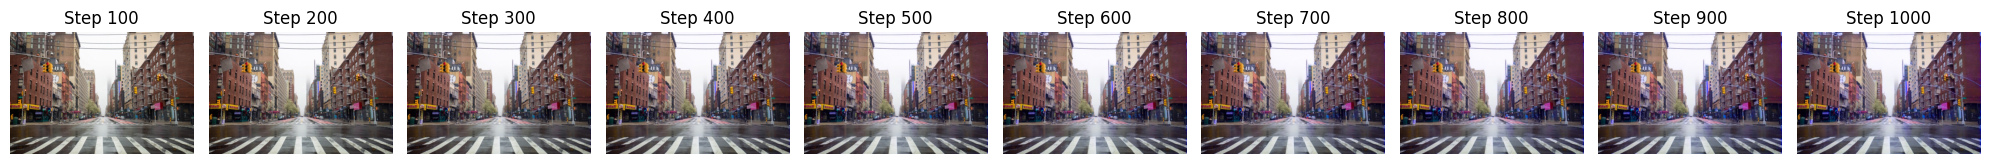

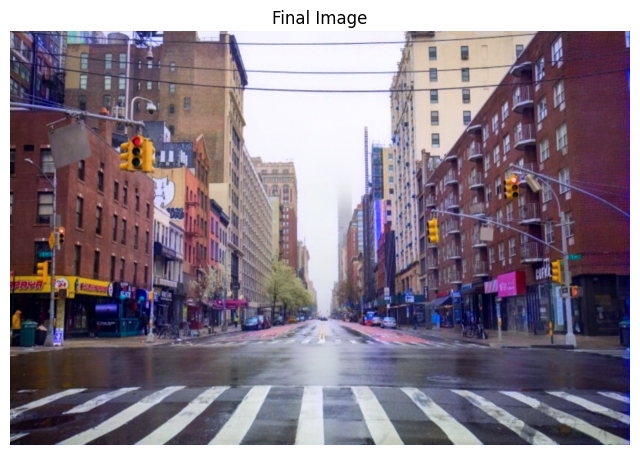

In [2]:
import torch
import torch.optim as optim
from torchvision import transforms, models
from torchvision.models import VGG16_Weights
from PIL import Image
import matplotlib.pyplot as plt

# 定义加载图像函数
def load_image(img_path, max_size=32, shape=None):
    image = Image.open(img_path).convert('RGB')
    size = max(max(image.size), max_size)
    if shape is not None:
        # 用于风格图像，保持与内容图像形状相同
        size = shape
    in_transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), 
                             (0.229, 0.224, 0.225))])
    image = in_transform(image)[:3, :, :].unsqueeze(0)
    return image

# 加载内容图像、风格图像
content = load_image('/kaggle/input/styletransfer/city.jpg').to('cuda')
style = load_image('/kaggle/input/styletransfer/cyberpunk.jpg', shape=content.shape[-2:]).to('cuda')

# 定义模型
vgg = models.vgg16(weights=VGG16_Weights.IMAGENET1K_V1).features
# 冻结‘模型’参数，不进行梯度下降：只使用VGG16的参数，不训练这些参数
for param in vgg.parameters():
    param.requires_grad = False
vgg.to('cuda')

# 定义图像特征提取函数
def get_features(image, model, layers=None):
    if layers is None:
        layers = {'0': 'conv1_1', # 第0+1个卷积层，在vgg16中名称为conv1_1
                  '5': 'conv2_1', # 第5+1个卷积层，在vgg16中名称为conv2_1
                  '10': 'conv3_1', '17': 'conv4_1', 
                  '19': 'conv4_2', '24': 'conv5_1'}
    features = {}
    x = image
    for name, layer in model._modules.items():
        x = layer(x) # 逐层前向传播
        if name in layers:
            # 保存指定层的特征，用于计算内容和风格损失
            features[layers[name]] = x
    return features

# 定义 Gram 矩阵
def gram_matrix(tensor):
    _, d, h, w = tensor.size()
    tensor = tensor.view(d, h * w)
    gram = torch.mm(tensor, tensor.t())
    return gram

# 提取内容和风格图像特征
content_features = get_features(content, vgg)
style_features = get_features(style, vgg)
# 计算风格图像的 Gram 矩阵
style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}

# 创建目标图像：从内容图像克隆，并启用梯度下降，优化目标图像！！
target = content.clone().requires_grad_(True).to('cuda')

# 定义每一层的权重
style_weights = {'conv1_1': 1,    # 第1个卷积块第1层权重，提取图像基本特征故权重最大
                 'conv2_1': 0.75,   # 第2个卷积块第1层权值，提取图像纹理特征
                 'conv3_1': 0.2,    # 第3个卷积块第1层权值，提取图像高级特征
                 'conv4_1': 0.2,    # 第4个卷积块第1层权值，提取图像高级特征
                 'conv5_1': 0.2}    # 第5个卷积块第1层权值，提取图像高级特征
# 内容图像权重
content_weight = 1
# 风格图像权重
style_weight = 1e-4  # 原值很大，在此缩小

# 优化器，此时优化目标图像 target ！！不是优化网络参数！
optimizer = optim.Adam([target], lr=0.005)
# 迭代次数
steps = 1000 

# 定义图像转换函数：将目标图像转换为numpy数组
def im_convert(tensor):
    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1, 2, 0)
    image = image * (0.229, 0.224, 0.225) + (0.485, 0.456, 0.406)
    image = image.clip(0, 1)
    return image

# 保留每100步的图像
images_at_steps = []

# 训练：迭代优化目标图像，最小化内容和风格损失
for i in range(1, steps+1):
    target_features = get_features(target, vgg)
    # 计算内容损失
    content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2'])**2)
    
    style_loss = 0
    # 计算每一层的风格损失
    for layer in style_weights:
        target_feature = target_features[layer]
        target_gram = gram_matrix(target_feature)
        style_gram = style_grams[layer]
        # 风格损失：权重 * (目标图像Gram矩阵 - 风格图像Gram矩阵) 的平方和
        layer_style_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
        _, d, h, w = target_feature.shape
        # 风格损失归一化
        style_loss += layer_style_loss / (d * h * w)
    
    total_loss = content_weight * content_loss + style_weight * style_loss
    
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    
    if i % 100 == 0:
        print(f'Step {i}:')
        print('Total loss: ', total_loss.item(), ',  content_loss: ', content_loss.item(), ',  style_loss: ', style_loss.item())
        images_at_steps.append(im_convert(target))

# 打印每100步的图像
fig, axes = plt.subplots(1, len(images_at_steps), figsize=(20, 4))
for i, (ax, img) in enumerate(zip(axes, images_at_steps)):
    ax.imshow(img)
    ax.set_title(f'Step {(i+1)*100}')
    ax.axis('off')

plt.tight_layout()
plt.show()

# 显示最终图像
plt.figure(figsize=(8, 8))
plt.imshow(images_at_steps[-1])
plt.title('Final Image')
plt.axis('off')
plt.show()

In [12]:
# <3> 图像数据预处理
import torchvision

# 对Image进行变换，将多个transform变换组合起来
transform = torchvision.transforms.Compose([
    # 将64x64图像转换为32x32像素
    torchvision.transforms.Resize((32, 32)), 
    # 将输入图像转换为张量(tensors), 并归一化至[0, 1]
    torchvision.transforms.ToTensor()]) 

# 将上面的组合变换应用到图像文件中，并生成数据集
dataset = torchvision.datasets.ImageFolder(root='/kaggle/input/sports/sports', transform=transform)

training images: 2872, testing images: 59


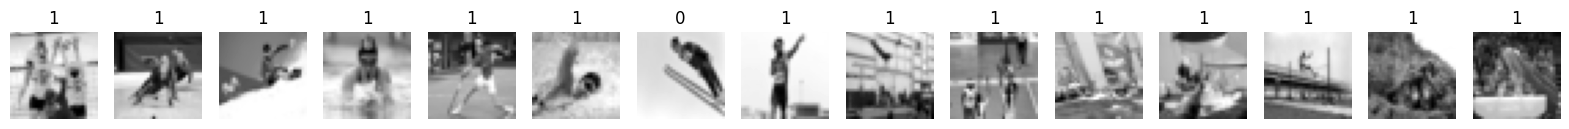

In [32]:
# <4> 数据集划分、加载
from torch.utils.data import DataLoader, random_split

train_size = int(0.98 * len(dataset))    # 80% for training
test_size  = len(dataset) - train_size  # 20% for testing

# 随机划分数据集
train_dataset, test_dataset = random_split(dataset, 
                                           [train_size, test_size])

# 数据加载
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=64, shuffle=True)

# 图像划分后数量、显示部分图像
import matplotlib.pyplot as plt

print(f"training images: {len(train_dataset)}, testing images: {len(test_dataset)}") 
fig = plt.figure(figsize=(20, 5))
for i in range(15):
    img, label = train_dataset[i]
    grayscale_img = img.mean(dim=0) # 将3通道的彩色图像转换为单通道的灰度图像
    ax = fig.add_subplot(1, 15, i + 1)
    ax.axis("off")
    ax.set_title(label)
    ax.imshow(grayscale_img.squeeze().numpy(), cmap="gray")

In [33]:
# <1> CPU / GPU
import torch

# 有GPU就用GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# print more information about the cuda device
print(torch.cuda.get_device_name(0))
print(torch.cuda.get_device_properties(0))
# device = "cpu"

Using cuda device
Tesla T4
_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15095MB, multi_processor_count=40, uuid=95ca2e3d-a5c2-9f47-68a3-748b42ef79fe, L2_cache_size=4MB)


In [ ]:
# <5> 模型定义、训练、显示
import torch.nn as nn
import torchsummary
import torchvision

# <5-1> 损失函数
criterion = nn.CrossEntropyLoss()

# <5-2> 加载已训练好的Resnet18模型参数（2种方法）
# ============
# 网上下载 预训练模型
model = torchvision.models.resnet18(pretrained=True)# 网上下载


In [35]:
# <5-3> 微调、修改模型结构（多种方法）
# 方法1：修改最后一层, 使其输出15个类别, 而不是1000个
#        其它层不锁定，参与训练。
#        然后训练所有层。
model.fc = nn.Linear(512, 15)

# 优化器
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

In [36]:
# <5-5> 将模型转移到 CPU / GPU 上
model = model.to(device)

# <5-6> 显示模型结构、参数信息
torchsummary.summary(model, input_size=(3, 32, 32), device=device)
# 输入图像大小为3x32x32, 即3通道, 32x32像素

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,408
       BatchNorm2d-2           [-1, 64, 16, 16]             128
              ReLU-3           [-1, 64, 16, 16]               0
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          36,864
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
            Conv2d-8             [-1, 64, 8, 8]          36,864
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
       BasicBlock-11             [-1, 64, 8, 8]               0
           Conv2d-12             [-1, 64, 8, 8]          36,864
      BatchNorm2d-13             [-1, 64, 8, 8]             128
             ReLU-14             [-1, 6

In [37]:
# <6> 计算正确率函数
def test(model,         # 模型
         data_loader,   # 数据加载器, train_loader或test_loader
         ):
    
    # <6-1> 进入评估模式
    model.eval()

    correct, total = 0, 0
    # <6-2> 计算正确预测个数
    with torch.no_grad():  
        for inputs, labels in tqdm(data_loader, desc="测试", leave=False):
            # 1）用GPU/CPU？
            inputs, labels = inputs.to(device), labels.to(device)

            # 2）前向传播，计算输出
            outputs = model(inputs)

            # 3）计算正确值、总数
            # 按行(=1)取最大值(预测结果)，返回最大值、最大值的索引
            _, predicted = torch.max(outputs, 1)  
            # 累加正确预测的个数
            correct += (predicted == labels).sum().item()
            # 累加总的样本个数
            total   += labels.size(0) # labels.shape[0]

    # 返回正确率
    return correct / total

In [38]:
# <7> 训练模型
from tqdm import tqdm

# 初始化训练过程中的指标：训练精度、测试精度、损失，用于绘图
train_acc_history, test_acc_history, loss_history = [], [], []

def train(model, train_loader): 
    # 将模型设置为训练模式，打开dropout等，更新参数，计算梯度
    model.train()  # 训练模式（默认）
    total_loss = 0
    #                          训练数据集     进度条描述    不保留进度条
    for inputs, labels in tqdm(train_loader, desc="训练", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)

        # 1) 向前传播计算结果
        outputs = model(inputs)

        # 2) 计算损失
        loss = criterion(outputs, labels)
        total_loss += loss.item()

        # 3) 反向传播
        loss.backward()

        # 4) 更新权重
        optimizer.step()
        optimizer.zero_grad()
    return total_loss / len(train_loader)


num_epochs = 10  # 训练次数
for epoch in range(num_epochs):
    train_loss = train(model, test_loader)  # 训练 #originally train_loader;changed according to question
    train_acc = test(model, test_loader)  # 测试 #originally train_loader;changed according to question
    test_acc = test(model, train_loader)  # 测试 #originally test_loader;changed according to question

    # 更新绘图指标
    train_acc_history.append(train_acc)
    test_acc_history.append(test_acc)
    loss_history.append(train_loss)

    # 打印训练信息
    print(
        f"Epoch {epoch + 1}/{num_epochs}, "
        + f"Loss: {train_loss:.2f}, "
        + f"Train accuracy: {train_acc_history[-1]:.2f}, "
        + f"Test accuracy:  {test_acc_history[-1]:.2f}"
    )


# 打印最终训练信息
print(f"Final train accuracy: {train_acc_history[-1]:.2f}")
print(f"Final test accuracy: {test_acc_history[-1]:.2f}")

Epoch 1/10, Loss: 3.50, Train accuracy: 0.00, Test accuracy:  0.00


Epoch 2/10, Loss: 2.07, Train accuracy: 0.08, Test accuracy:  0.04


Epoch 3/10, Loss: 1.06, Train accuracy: 0.78, Test accuracy:  0.65


Epoch 4/10, Loss: 0.48, Train accuracy: 0.95, Test accuracy:  0.96


Epoch 5/10, Loss: 0.22, Train accuracy: 0.95, Test accuracy:  0.97


Epoch 6/10, Loss: 0.12, Train accuracy: 0.95, Test accuracy:  0.97


Epoch 7/10, Loss: 0.07, Train accuracy: 0.95, Test accuracy:  0.97


Epoch 8/10, Loss: 0.04, Train accuracy: 0.95, Test accuracy:  0.97


Epoch 9/10, Loss: 0.03, Train accuracy: 0.95, Test accuracy:  0.97


Epoch 10/10, Loss: 0.02, Train accuracy: 0.95, Test accuracy:  0.97
Final train accuracy: 0.95
Final test accuracy: 0.97


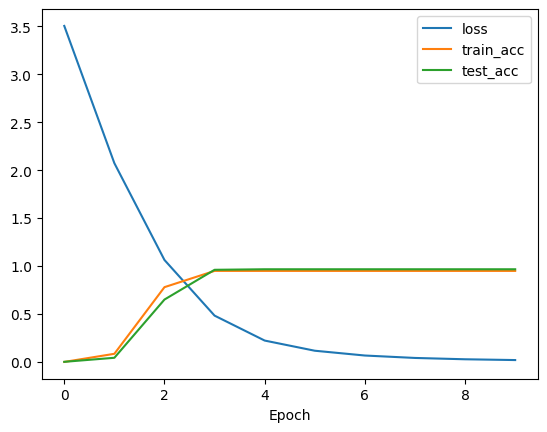

In [39]:
# <8> 绘制训练过程中的指标

# 定义绘制函数
def draw_plot(loss_history, train_acc_history, test_acc_history):
    plt.figure()
    plt.plot(loss_history,      label="loss")
    plt.plot(train_acc_history, label="train_acc")
    plt.plot(test_acc_history,  label="test_acc")
    plt.legend()
    plt.xlabel("Epoch")
    plt.show()
    
# 绘图    
draw_plot(loss_history, train_acc_history, test_acc_history)